In [1]:
## Import Statements

import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd, inv
import skimage as ski
from skimage import io

#### Problem 1: Estimating Homography

homography:
 [[ 2.93598977e-03 -3.00671523e-04  3.66270709e-01]
 [-3.49639673e-03  2.76415429e-03  9.30467644e-01]
 [-1.23271691e-05 -6.96582274e-07  6.86699848e-03]]

transformed image: 


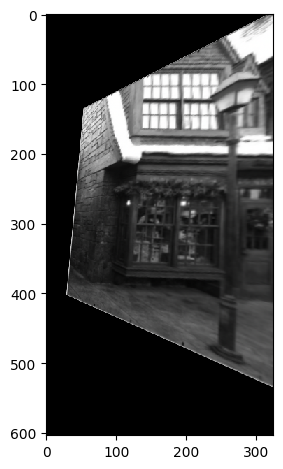

In [11]:
## STEP 1: Deriving the corresponding point coordinates

# img = cv.imread("{{FILENAME}}.png")
# plt.imshow(img)
# x = plt.ginput(4)

# front view (these are our target p' points - we want to determine the mapping from side to front)
FRONT = np.array([
    [132.18181818181813, 268.0871212121212], 
    [244.5681818181817, 272.1590909090909], 
    [244.5681818181817, 360.92803030303025], 
    [129.73863636363632, 356.85606060606057]
], dtype=np.float32)

# side view (p points)
SIDE = np.array([
    [133.08441558441547, 317.18831168831167], 
    [227.8679653679652, 328.6277056277056], 
    [230.3192640692639, 440.57034632034635], 
    [137.1699134199133, 463.4491341991342]
], dtype=np.float32)

## STEP 2: Generating the matrix of known values A: following the form Aq = 0
# note: we use 4 known corresponding points on each image to generate 8 equations, solve for our 8 unknowns h_1, h_2, ..., h_8
# (the bottom-right most variable h_9 in the H matrix can be any number due to the homogeneous coordinate scale-invariance property)

j = 0
A = np.zeros(shape=[SIDE.shape[0] * 2,9])
for i, (s, f) in enumerate(zip(SIDE, FRONT)):
    A[j]   = np.array([[-1*(s[0]), -1*s[1], -1, 0, 0, 0, f[0]*s[0], f[0]*s[1], f[0]]])
    A[j+1] = np.array([[0, 0, 0, -1*s[0], -1*s[1], -1, f[1]*s[0], f[1]*s[1], f[1]]])
    j += 2

## STEP 3: Calculating the nullspace of the A matrix yields the values of the H matrix h_1 ... h_9)
# note: the values of the A matrix are calculated by putting the system of equations in the form Aq = 0
# here A represents the known values (p and p' for 4 pairs of points) and q represents the unknown values of the homography H

_, S, VT = svd(A)
H = np.reshape(VT[-1], (3,3))
print("homography:\n", H)

## STEP 4: apply the newly calculated homography to the sideview image to try to replicate the front view image
# note: the ski.transform.warp function calls for an inverted mapping argument, so we pass in the inverse of H here
# we are using a built-in warping function to perform the point-by-point warping of the original image

img = cv2.imread("side_view.png")
transformed_img = ski.transform.warp(img, inv(H))

print("\ntransformed image: ")
io.imshow(transformed_img)
io.show()